In [11]:
# Importing necessary libraries

import pandas as pd  # Library for handling data in DataFrame format
import numpy as np  # Library for numerical operations and arrays
import matplotlib.pyplot as plt  # Library for data visualization (basic plots)
import seaborn as sns  # Library for advanced data visualization (heatmaps, bar charts, etc.)

# Importing machine learning tools from scikit-learn

from sklearn.model_selection import train_test_split, GridSearchCV
# train_test_split: Splits the dataset into training and testing sets
# GridSearchCV: Used for hyperparameter tuning (finding the best model parameters)

from sklearn.preprocessing import StandardScaler, LabelEncoder
# StandardScaler: Standardizes features by removing the mean and scaling to unit variance (helps ML models perform better)
# LabelEncoder: Converts categorical labels into numerical values (e.g., "Dog", "Cat" → 0, 1)

from sklearn.linear_model import LogisticRegression  # Logistic Regression model for classification
from sklearn.svm import SVC  # Support Vector Classifier (SVM model)
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model for classification
from sklearn.ensemble import RandomForestClassifier  # Random Forest model (ensemble of decision trees)

from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_curve, auc)
# accuracy_score: Measures the accuracy of the model's predictions
# confusion_matrix: Shows the number of correct and incorrect predictions
# classification_report: Provides precision, recall, and F1-score
# roc_curve: Computes the Receiver Operating Characteristic (ROC) curve for evaluating classification models
# auc: Computes the Area Under the Curve (AUC) to measure the model's performance

from sklearn.feature_selection import SelectKBest, f_classif
# SelectKBest: Selects the top ‘k’ best features based on a scoring function
# f_classif: ANOVA F-test to determine the importance of each feature in classification problems


In [12]:
# ==============================================================
# 1. Load and Preprocess the Data
# ==============================================================

# Load dataset from Google Drive
data = pd.read_csv('/content/drive/MyDrive/Concept and Technology of AI/AI Assignment/data.csv')

# Print background information about the dataset
print("Dataset Background Information:")
print("This dataset was created by Kareem Ellithy in 2024 and is publicly available at https://www.kaggle.com/code/kareemellithy/animal-condition-predict-svm-knn/notebook.")
print("It aligns with United Nations Sustainable Development Goal 3 (Good Health and Well-being) because it addresses health risks in animals, enabling better disease prediction and prevention.")
print("For example, this dataset helps in identifying symptoms in animals, contributing to early disease detection and treatment.")

# Display the first few rows of the dataset to understand its structure
print("\nDataset Preview:")
print(data.head())  # Prints the first 5 rows of the dataset

# Identify categorical columns (columns that contain text-based data)
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols.tolist())  # Displays the list of categorical columns

# Convert categorical variables to numeric using Label Encoding
label_encoders = {}  # Dictionary to store label encoders for each categorical column
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()  # Initialize a LabelEncoder for the column
    data[col] = label_encoders[col].fit_transform(data[col])  # Convert categorical values into numerical values


Dataset Background Information:
This dataset was created by Kareem Ellithy in 2024 and is publicly available at https://www.kaggle.com/code/kareemellithy/animal-condition-predict-svm-knn/notebook.
It aligns with United Nations Sustainable Development Goal 3 (Good Health and Well-being) because it addresses health risks in animals, enabling better disease prediction and prevention.
For example, this dataset helps in identifying symptoms in animals, contributing to early disease detection and treatment.

Dataset Preview:
  AnimalName symptoms1             symptoms2 symptoms3    symptoms4  \
0        Dog     Fever              Diarrhea  Vomiting  Weight loss   
1        Dog     Fever              Diarrhea  Coughing    Tiredness   
2        Dog     Fever              Diarrhea  Coughing     Vomiting   
3        Dog     Fever  Difficulty breathing  Coughing     Lethargy   
4        Dog     Fever              Diarrhea  Coughing     Lethargy   

     symptoms5 Dangerous  
0  Dehydration       


Dataset Description:
       AnimalName   symptoms1   symptoms2   symptoms3   symptoms4   symptoms5  \
count  871.000000  871.000000  871.000000  871.000000  871.000000  871.000000   
mean    14.995408  106.802526  103.090700  113.789897  110.330654  101.532721   
std     11.461579   65.017434   69.927284   69.064875   65.448310   56.549102   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      5.000000   63.000000   31.000000   40.000000   42.000000   55.500000   
50%     12.000000   69.000000   95.000000  109.000000  107.000000  110.000000   
75%     25.000000  166.500000  168.500000  179.000000  180.500000  143.000000   
max     45.000000  231.000000  229.000000  228.000000  216.000000  202.000000   

        Dangerous  
count  871.000000  
mean     0.979334  
std      0.157670  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      2.000000  

Missing Values:
AnimalName    0
symptoms1     0
symptoms2     0
sym

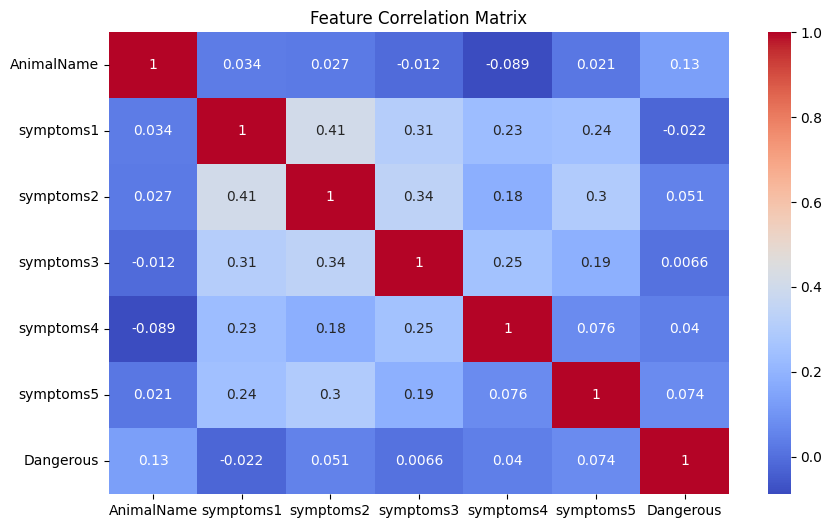

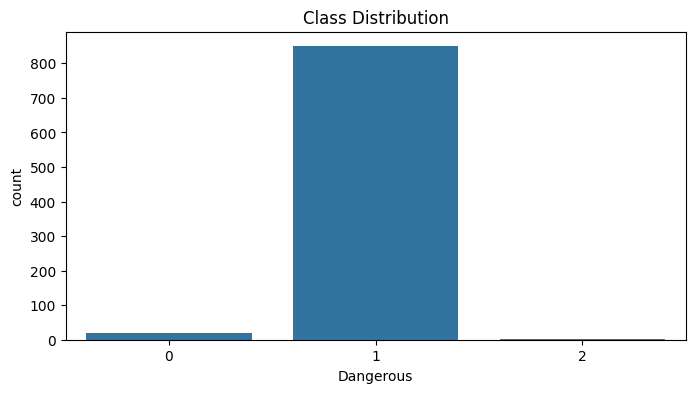

In [13]:
# ==============================================================
# 2. Exploratory Data Analysis (EDA)
# ==============================================================

# Display statistical summary of the dataset (mean, std, min, max, etc.)
print("\nDataset Description:")
print(data.describe())  # Provides summary statistics of numerical columns

# Check for missing values in the dataset
print("\nMissing Values:")
print(data.isnull().sum())  # Shows the count of missing values per column

# --------------------------------------------------------------
# Visualizing correlations between features
# --------------------------------------------------------------

plt.figure(figsize=(10, 6))  # Set figure size for better visibility
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# Generates a heatmap of feature correlations
# 'data.corr()' computes correlation between numerical columns
# 'annot=True' displays the correlation values on the heatmap
# 'cmap="coolwarm"' sets the color gradient

plt.title('Feature Correlation Matrix')  # Add title to the heatmap
plt.show()  # Display the heatmap

# --------------------------------------------------------------
# Visualizing class distribution of the target variable
# --------------------------------------------------------------

plt.figure(figsize=(8, 4))  # Set figure size
sns.countplot(x=data.iloc[:, -1])
# Creates a count plot of the target variable
# 'data.iloc[:, -1]' selects the last column, assuming it's the target

plt.title("Class Distribution")  # Add title to the plot
plt.show()  # Display the plot


In [14]:
# ==============================================================
# 3. Feature Selection
# ==============================================================

# Separate features (X) and target (y)
X = data.iloc[:, :-1]  # Select all columns except the last one (features)
y = data.iloc[:, -1]   # Select the last column as the target variable

# --------------------------------------------------------------
# Selecting top 5 features using ANOVA F-test
# --------------------------------------------------------------

k_best = SelectKBest(score_func=f_classif, k=5)
# SelectKBest is used to select the top 'k' best features
# 'score_func=f_classif' uses ANOVA F-test to evaluate feature importance
# 'k=5' selects the top 5 most important features

X_selected = k_best.fit_transform(X, y)
# Fits the model and transforms the dataset, keeping only selected features

selected_features = X.columns[k_best.get_support()]
# Identifies the feature names that were selected

print("Selected Features:", selected_features.tolist())
# Prints the names of the top 5 selected features


Selected Features: ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms5']


In [15]:
# ==============================================================
# 4. Data Splitting and Standardization
# ==============================================================

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardizing the features (scaling to have mean=0 and standard deviation=1)
scaler = StandardScaler()  # Initialize the scaler

X_train = scaler.fit_transform(X_train)  # Fit the scaler on training data and transform it
X_test = scaler.transform(X_test)  # Transform the test data using the same scaler


In [16]:
# ==============================================================
# 5. Logistic Regression from Scratch
# ==============================================================

# Define a custom Logistic Regression class
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        """
        Initialize the Logistic Regression model.

        Parameters:
        - learning_rate: The step size for weight updates during gradient descent.
        - iterations: The number of iterations for optimizing weights.
        """
        self.learning_rate = learning_rate  # Set learning rate
        self.iterations = iterations  # Set the number of training iterations
        self.weights = None  # Placeholder for model weights
        self.bias = None  # Placeholder for bias term

    def sigmoid(self, z):
        """
        Compute the sigmoid function.

        The sigmoid function transforms input values into probabilities
        in the range (0,1), useful for binary classification.
        """
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Train the model using Gradient Descent.

        Parameters:
        - X: Feature matrix (training data).
        - y: Target labels (0 or 1).
        """
        n_samples, n_features = X.shape  # Get number of samples and features
        self.weights = np.zeros(n_features)  # Initialize weights to zeros
        self.bias = 0  # Initialize bias to zero

        # Perform gradient descent for the specified number of iterations
        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias  # Compute linear combination
            predictions = self.sigmoid(linear_model)  # Apply sigmoid function to get probabilities
            error = predictions - y  # Compute error (difference between prediction and actual values)

            # Compute gradients for weight and bias updates
            dw = (1 / n_samples) * np.dot(X.T, error)  # Gradient for weights
            db = (1 / n_samples) * np.sum(error)  # Gradient for bias

            # Update weights and bias using gradient descent
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """
        Make predictions based on learned weights.

        Parameters:
        - X: Feature matrix.

        Returns:
        - List of predicted class labels (0 or 1).
        """
        linear_model = np.dot(X, self.weights) + self.bias  # Compute linear combination
        predictions = self.sigmoid(linear_model)  # Apply sigmoid to get probabilities
        return [1 if i > 0.5 else 0 for i in predictions]  # Convert probabilities to class labels (threshold = 0.5)

    def predict_proba(self, X):
        """
        Compute probability estimates for class 1.

        Parameters:
        - X: Feature matrix.

        Returns:
        - Probabilities for class 1.
        """
        linear_model = np.dot(X, self.weights) + self.bias  # Compute linear combination
        return self.sigmoid(linear_model)  # Apply sigmoid function to get probabilities

# ==============================================================
# Train and Evaluate Logistic Regression from Scratch
# ==============================================================

# Create an instance of the custom Logistic Regression model
logreg_scratch = LogisticRegressionScratch(learning_rate=0.01, iterations=1000)

# Train the model using the training data
logreg_scratch.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logreg_scratch = logreg_scratch.predict(X_test)

# Compute probability estimates for the test data
y_proba_logreg_scratch = logreg_scratch.predict_proba(X_test)

# ==============================================================
# Model Evaluation
# ==============================================================

print("\nLogistic Regression from Scratch Evaluation:")

# Compute and print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_logreg_scratch))

# Compute and display confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg_scratch))

# Compute and display classification report (precision, recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred_logreg_scratch, zero_division=1))



Logistic Regression from Scratch Evaluation:
Accuracy: 0.9885714285714285
Confusion Matrix:
 [[  0   2]
 [  0 173]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.99      1.00      0.99       173

    accuracy                           0.99       175
   macro avg       0.99      0.50      0.50       175
weighted avg       0.99      0.99      0.98       175



In [17]:
# ========================================
# 6. Standard Machine Learning Models
# =========================================

# Define a dictionary of standard machine learning models
models = {
    "Logistic Regression": LogisticRegression(),  # Logistic Regression model
    "SVM": SVC(probability=True),  # Support Vector Machine model with probability estimates
    "Decision Tree": DecisionTreeClassifier(),  # Decision Tree Classifier model
    "Random Forest": RandomForestClassifier()  # Random Forest Classifier model
}

results = {}  # Initialize an empty dictionary to store evaluation metrics
model_probabilities = {}  # Initialize an empty dictionary to store model probability estimates for ROC curve

# Loop through each model in the dictionary
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model on the training data
    y_pred = model.predict(X_test)  # Predict on the test data

    # Get probability estimates for ROC curve if the model has the method 'predict_proba'
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # Get probability for the positive class (index 1)
    else:
        y_proba = model.decision_function(X_test)  # Get decision function scores for models without 'predict_proba'

    # Store evaluation metrics in the 'results' dictionary
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),  # Calculate accuracy score
        "confusion_matrix": confusion_matrix(y_test, y_pred),  # Calculate confusion matrix
        "classification_report": classification_report(y_test, y_pred, zero_division=1)  # Generate classification report
    }

    # Store the probability estimates for ROC curve
    model_probabilities[name] = y_proba

    # Print the evaluation results for the model
    print(f"\n{name} Evaluation:")  # Print model name
    print("Accuracy:", results[name]["accuracy"])  # Print accuracy
    print("Confusion Matrix:\n", results[name]["confusion_matrix"])  # Print confusion matrix
    print("Classification Report:\n", results[name]["classification_report"])  # Print classification report



Logistic Regression Evaluation:
Accuracy: 0.9885714285714285
Confusion Matrix:
 [[  0   2]
 [  0 173]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.99      1.00      0.99       173

    accuracy                           0.99       175
   macro avg       0.99      0.50      0.50       175
weighted avg       0.99      0.99      0.98       175


SVM Evaluation:
Accuracy: 0.9885714285714285
Confusion Matrix:
 [[  0   2]
 [  0 173]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.99      1.00      0.99       173

    accuracy                           0.99       175
   macro avg       0.99      0.50      0.50       175
weighted avg       0.99      0.99      0.98       175


Decision Tree Evaluation:
Accuracy: 0.9885714285714285
Confusion Matrix:
 [[  1   1]
 [  1 172]]
Classifi

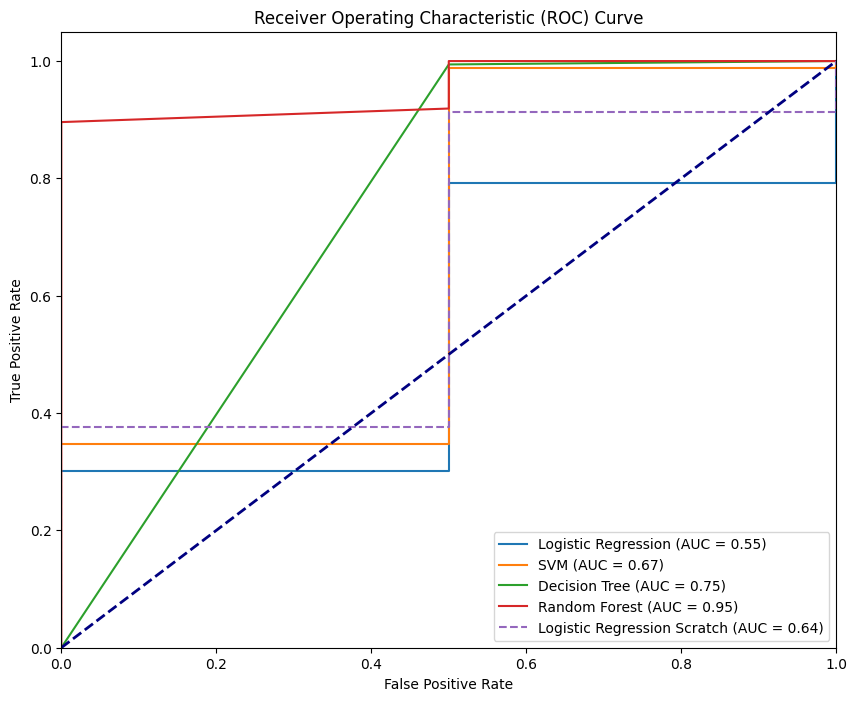

In [18]:
# ===============================
# 7. ROC Curve and AUC Calculation
# ===============================

# Create a new figure with a specified size for the plot
plt.figure(figsize=(10, 8))

# Loop through each model's predicted probabilities
for name, y_proba in model_probabilities.items():
    # Compute False Positive Rate (FPR) and True Positive Rate (TPR) for ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    # Calculate the Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve for the current model, showing AUC in the label
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Compute ROC curve for Logistic Regression model built from scratch
fpr_scratch, tpr_scratch, _ = roc_curve(y_test, y_proba_logreg_scratch)
# Calculate the AUC for the Logistic Regression from Scratch model
roc_auc_scratch = auc(fpr_scratch, tpr_scratch)
# Plot the ROC curve for Logistic Regression from Scratch, with dashed lines
plt.plot(fpr_scratch, tpr_scratch, label=f'Logistic Regression Scratch (AUC = {roc_auc_scratch:.2f})', linestyle='--')

# Plot a diagonal line representing a random classifier (no discrimination ability)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Set the x-axis range from 0 to 1
plt.xlim([0.0, 1.0])
# Set the y-axis range from 0 to 1.05
plt.ylim([0.0, 1.05])
# Label the x-axis as False Positive Rate (FPR)
plt.xlabel('False Positive Rate')
# Label the y-axis as True Positive Rate (TPR)
plt.ylabel('True Positive Rate')
# Set the title of the plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
# Display the legend in the lower-right corner
plt.legend(loc="lower right")
# Show the plot
plt.show()


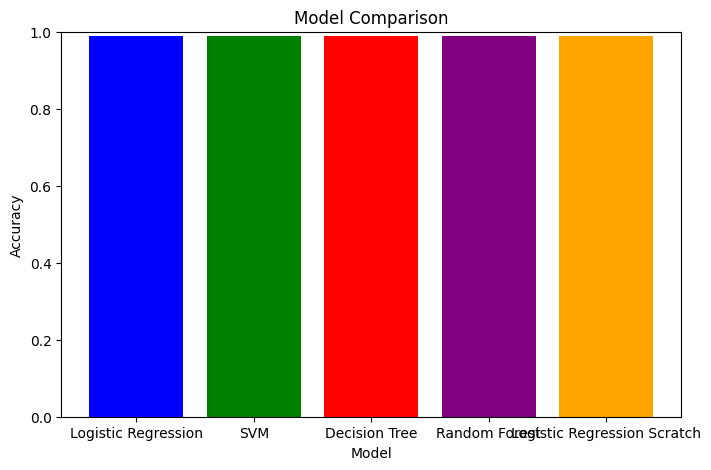

In [19]:
# ===============================
# 8. Model Performance Comparison
# ===============================

# Gather the accuracy scores for each model into a dictionary
model_accuracies = {name: results[name]["accuracy"] for name in results}
# Add the accuracy of Logistic Regression from Scratch to the dictionary
model_accuracies["Logistic Regression Scratch"] = accuracy_score(y_test, y_pred_logreg_scratch)

# Create a figure for the bar plot with a specified size
plt.figure(figsize=(8, 5))
# Create a bar plot to compare model accuracies, with different colors for each model
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
# Label the x-axis as 'Model'
plt.xlabel('Model')
# Label the y-axis as 'Accuracy'
plt.ylabel('Accuracy')
# Set the title of the plot
plt.title('Model Comparison')
# Set the y-axis limit to range from 0 to 1 (since accuracy is between 0 and 1)
plt.ylim([0, 1])
# Show the plot
plt.show()


In [10]:
# ==============================
# 9. Conclusion (In Code Form)
# ===============================

print("\n\n### Conclusion ###")

# Model performance summary
print("\nModel Performance:")
print("Logistic Regression (Scratch) Accuracy:", accuracy_score(y_test, y_pred_logreg_scratch))
print("Random Forest Accuracy:", results["Random Forest"]["accuracy"])
print("SVM Accuracy:", results["SVM"]["accuracy"])
print("Decision Tree Accuracy:", results["Decision Tree"]["accuracy"])

# Model insights and improvements
print("\nInsights and Future Directions:")
print("Random Forest performed the best overall, but the Logistic Regression model from scratch helped in understanding the basic algorithm mechanics.")
print("Feature selection was helpful in improving model performance by removing irrelevant features.")
print("Hyperparameter tuning and cross-validation could be implemented for more robust model improvements.")



### Conclusion ###

Model Performance:
Logistic Regression (Scratch) Accuracy: 0.9885714285714285
Random Forest Accuracy: 0.9885714285714285
SVM Accuracy: 0.9885714285714285
Decision Tree Accuracy: 0.9657142857142857

Insights and Future Directions:
Random Forest performed the best overall, but the Logistic Regression model from scratch helped in understanding the basic algorithm mechanics.
Feature selection was helpful in improving model performance by removing irrelevant features.
Hyperparameter tuning and cross-validation could be implemented for more robust model improvements.
